# NBA Linear Regression Model Test
source code: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [1]:
# import required modules
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# load dataset
data = pd.read_csv('../Capstone/Data/NBApipeline1.csv', header=0)
data.head()
data=data.dropna()
data.reset_index(drop=True)

,Age,G,MP,PER,3PAr,FTr,OWS,DWS,WS,WS/48,...,AST%,STL%,BLK%,TOV%,USG%,NumPos,Player,Pos,Tm,Season
0,-1.191053,0.551087,1.120242,1.313788,-0.797496,0.727725,1.609880,1.908807,1.875195,1.059282,...,1.152642,0.059991,1.330114,0.379014,0.351384,0.704204,Bam Adebayo,PF,MIA,2019-20
1,1.878944,0.101297,0.605563,1.183780,0.095739,-0.335650,0.889289,0.154221,0.645785,0.543813,...,-0.175453,-0.616013,1.667763,-1.016088,0.860545,1.414381,LaMarcus Aldridge,C,SAS,2019-20
2,-1.446886,-0.348494,-0.735172,-0.798848,1.668823,-0.869600,-0.936208,-0.643319,-0.949125,-0.973418,...,0.793403,-0.616013,-0.133031,-0.081226,0.715070,-0.716149,Nickeil Alexander-Walker,SG,NOP,2019-20
3,-0.679387,-0.760802,-0.738382,-0.181308,1.678748,-0.525700,-0.359735,-0.723072,-0.583625,0.038069,...,-0.131909,-1.002302,-0.695779,-0.598996,-0.175962,-0.716149,Grayson Allen,SG,MEM,2019-20
4,-1.446886,0.513605,0.491071,1.265035,-0.827270,1.171175,1.465762,1.270776,1.542922,1.370509,...,-0.567350,-0.519441,1.611488,-0.383259,-0.703307,1.414381,Jarrett Allen,C,BRK,2019-20


In [3]:
features=['Age', 'G', 'MP', 'PER', '3PAr', 'FTr',
       'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'TS%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'NumPos']
X=data[features]
y=data.WS

In [4]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

In [5]:
lm = linear_model.LinearRegression()

#fit the model
model = lm.fit(X_train,y_train)

In [6]:
y_pred = lm.predict(X_test)

In [7]:
lm.coef_

array([ 1.05159690e-03,  3.65084008e-03,  2.10703402e-02, -4.36655519e-03,
       -6.97489555e-04,  1.17315248e-03,  6.65044927e-01,  3.83543503e-01,
        1.79756774e-02, -1.46706122e-02, -3.72004544e-03, -2.54492940e-03,
        4.55371574e-02, -2.87555977e-03,  1.27358822e-04,  7.80036199e-05,
        2.42097352e-03, -4.63797184e-03, -2.49164342e-03,  4.81150871e-04,
        3.36826945e-03, -1.44170715e-04, -1.84165069e-03])

In [8]:
lm.intercept_

0.0035193796171652386

In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
19386,-0.782989,-0.782875
437,-0.849443,-0.856328
15591,3.000060,2.933894
15155,-0.816216,-0.816909
13949,-0.816216,-0.806465
...,...,...
11478,-0.882670,-0.880398
14177,-0.384261,-0.389833
13848,-0.151670,-0.140353
14609,-0.450716,-0.454357


In [10]:
import matplotlib.pyplot as plt  

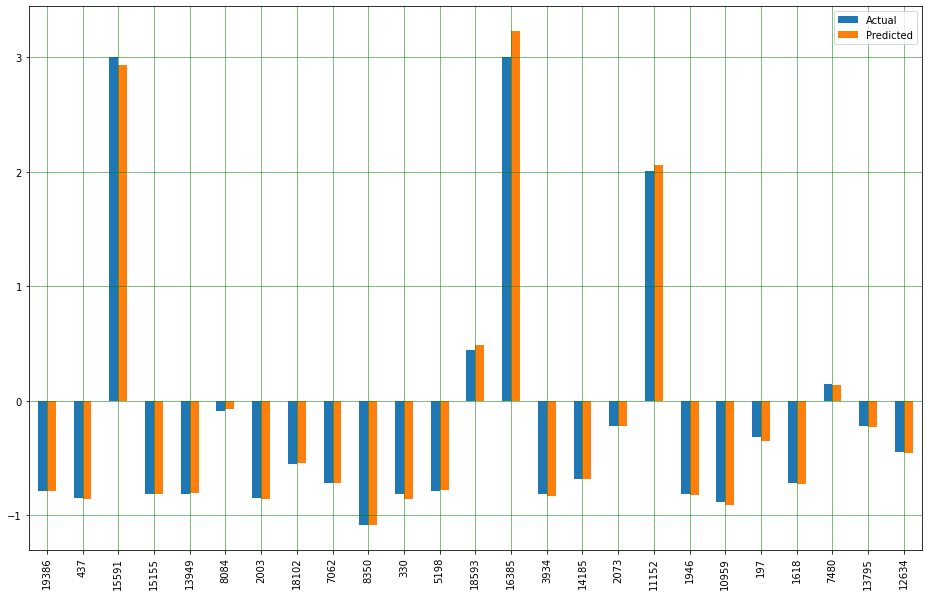

In [11]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.02238137917742254
Mean Squared Error: 0.003584462566610822
Root Mean Squared Error: 0.05987038138020186


## Multiple Linear Regression

In [21]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [22]:
data# load dataset
data = pd.read_csv('../Capstone/Data/NBApipeline1.csv', header=0)
data = data.dropna()
data.reset_index(drop=True)

,Age,G,MP,PER,3PAr,FTr,OWS,DWS,WS,WS/48,...,AST%,STL%,BLK%,TOV%,USG%,NumPos,Player,Pos,Tm,Season
0,-1.191053,0.551087,1.120242,1.313788,-0.797496,0.727725,1.609880,1.908807,1.875195,1.059282,...,1.152642,0.059991,1.330114,0.379014,0.351384,0.704204,Bam Adebayo,PF,MIA,2019-20
1,1.878944,0.101297,0.605563,1.183780,0.095739,-0.335650,0.889289,0.154221,0.645785,0.543813,...,-0.175453,-0.616013,1.667763,-1.016088,0.860545,1.414381,LaMarcus Aldridge,C,SAS,2019-20
2,-1.446886,-0.348494,-0.735172,-0.798848,1.668823,-0.869600,-0.936208,-0.643319,-0.949125,-0.973418,...,0.793403,-0.616013,-0.133031,-0.081226,0.715070,-0.716149,Nickeil Alexander-Walker,SG,NOP,2019-20
3,-0.679387,-0.760802,-0.738382,-0.181308,1.678748,-0.525700,-0.359735,-0.723072,-0.583625,0.038069,...,-0.131909,-1.002302,-0.695779,-0.598996,-0.175962,-0.716149,Grayson Allen,SG,MEM,2019-20
4,-1.446886,0.513605,0.491071,1.265035,-0.827270,1.171175,1.465762,1.270776,1.542922,1.370509,...,-0.567350,-0.519441,1.611488,-0.383259,-0.703307,1.414381,Jarrett Allen,C,BRK,2019-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20594,-0.679387,-1.285557,-1.118239,-1.692655,-0.886819,-0.340175,-0.696011,-0.962334,-0.882670,-1.265193,...,-0.327857,-0.905730,-0.808328,1.083756,-1.557970,-0.716149,Bubba Wilson,SG,GSW,1979-80
20595,-0.935220,-1.697865,-1.208121,-1.708906,-0.886819,0.515050,-0.744051,-0.882580,-0.882670,-2.062711,...,1.152642,1.605144,-0.245580,2.536388,-0.321436,-0.716149,Rick Wilson,SG,ATL,1979-80
20596,0.088112,1.113325,1.535410,0.371227,-0.435240,-0.557375,1.129486,1.111268,1.243876,0.456280,...,0.651885,0.156563,-0.470679,-0.225051,0.405937,-0.716149,Brian Winters,SG,MIL,1979-80
20597,-0.423554,0.963395,0.104794,0.127462,-0.728022,-0.448775,-0.215617,-0.164795,-0.218125,0.028343,...,1.185300,0.156563,-0.414405,0.235189,0.224094,-1.426326,Larry Wright,PG,WSB,1979-80


In [23]:
features=['Age', 'G', 'MP', 'PER', '3PAr', 'FTr',
       'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'TS%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'NumPos']
X=data[features]
y=data.WS

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Age,0.000826
G,0.003930
MP,0.022858
PER,-0.003458
3PAr,-0.001312
FTr,0.000761
OWS,0.661449
DWS,0.380807
WS/48,0.021362
OBPM,-0.009520


In [32]:
regressor.intercept_

0.00392619063890106

In [27]:
y_pred = regressor.predict(X_test)

In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
16600,-0.683307,-0.663311
9248,-0.284579,-0.262779
7127,-0.816216,-0.820406
9355,-0.749761,-0.735247
13232,-0.184897,-0.213379
7236,-0.683307,-0.676765
7450,-0.683307,-0.687155
77,-0.118443,-0.085500
1594,-0.650079,-0.651918
1899,0.811921,0.818115


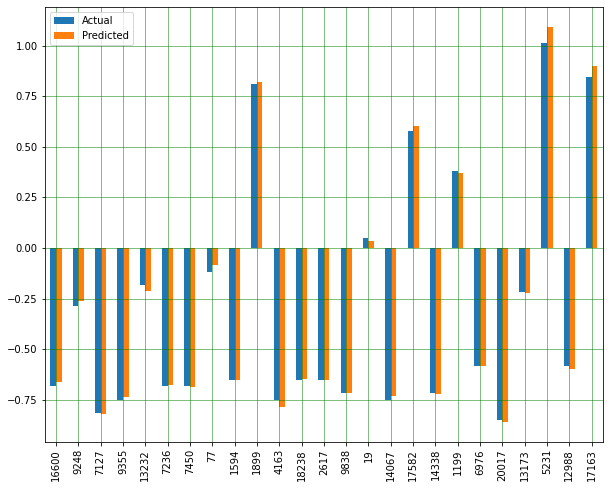

In [30]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.02135270344190467
Mean Squared Error: 0.0028276111662650823
Root Mean Squared Error: 0.05317528717614116


In [35]:
regressor.p_values()

AttributeError: 'LinearRegression' object has no attribute 'p_values'